In [1]:
# Importing the Libraires
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import investpy
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,LSTM
plt.style.use("fivethirtyeight")

In [2]:
#Retrieving the Stocks from Investing.com via investpy Module
df = investpy.get_stock_historical_data(stock='TAMO',
                                        country='India',
                                        from_date='01/01/2010',
                                        to_date='31/12/2020')

In [3]:
# Display the dataSet
print(df)

              Open    High     Low   Close    Volume Currency
Date                                                         
2010-01-04  156.30  164.04  156.18  163.54  27906472      INR
2010-01-05  162.26  167.15  153.25  160.69  23669338      INR
2010-01-06  162.20  162.93  159.31  160.93  14990833      INR
2010-01-07  161.17  161.92  154.34  155.43  22722050      INR
2010-01-08  156.32  159.25  155.34  156.28  16495790      INR
...            ...     ...     ...     ...       ...      ...
2020-12-24  172.00  178.00  172.00  175.95  73831296      INR
2020-12-28  179.85  187.40  179.00  186.35  98012096      INR
2020-12-29  187.90  188.45  181.10  183.45  71318096      INR
2020-12-30  183.10  185.40  180.40  184.15  38576200      INR
2020-12-31  184.85  187.50  182.80  183.85  48978300      INR

[2729 rows x 6 columns]


In [4]:
df.shape

(2729, 6)

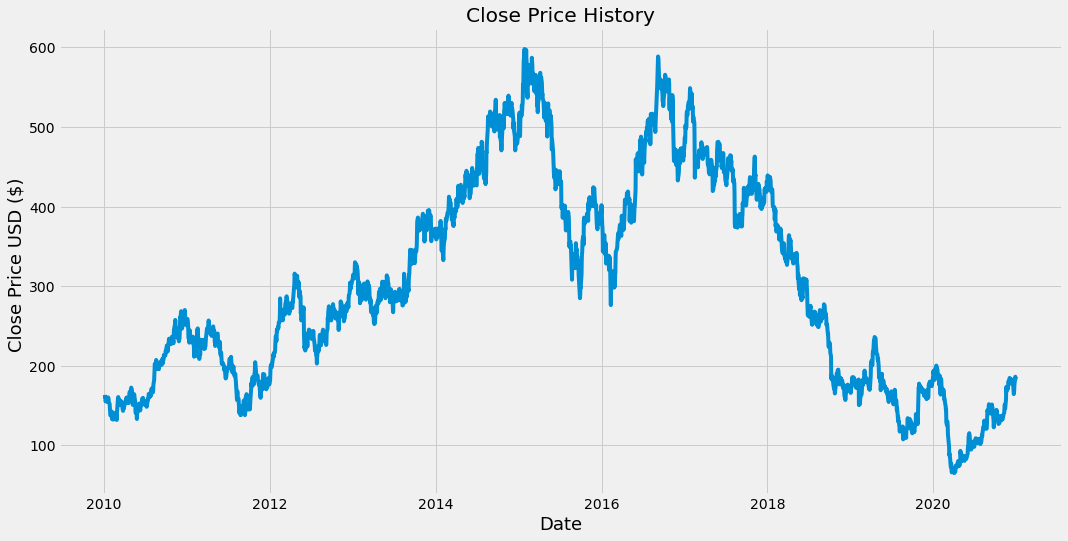

In [5]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($) ',fontsize=18)
plt.show()

In [6]:
# Create a new dataFrame with "Date" and "Close" column
data = df.filter(['Close'])

In [7]:
print(data)

             Close
Date              
2010-01-04  163.54
2010-01-05  160.69
2010-01-06  160.93
2010-01-07  155.43
2010-01-08  156.28
...            ...
2020-12-24  175.95
2020-12-28  186.35
2020-12-29  183.45
2020-12-30  184.15
2020-12-31  183.85

[2729 rows x 1 columns]


In [8]:
# Create the dataFrame to a numpy array
dataSet = data.values

# Create the number of rows to train the model on
training_data_len = math.ceil(len(dataSet) * .8)

training_data_len

2184

In [9]:
# Scale the data--
# in practise its always advantagious to 
#       ---apply preprocessing transformation, scaling,normalization of dataset

scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataSet)

scaled_data

array([[0.184374  ],
       [0.17902521],
       [0.17947563],
       ...,
       [0.22174052],
       [0.22305426],
       [0.22249123]])

In [10]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len,:]

# Split the data into x_train and y_train data set
x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()
        


[array([0.184374  , 0.17902521, 0.17947563, 0.16915339, 0.17074864,
       0.17088002, 0.16945367, 0.16894694, 0.16791472, 0.1735075 ,
       0.17857478, 0.17703583, 0.17637896, 0.16813993, 0.16639453,
       0.16290374, 0.14407973, 0.14152732, 0.1353152 , 0.14477413,
       0.14090798, 0.14541223, 0.13355104, 0.12707618, 0.13006024,
       0.1274703 , 0.12861513, 0.12615656, 0.1328754 , 0.13114877,
       0.13858079, 0.14167746, 0.14105812, 0.13732335, 0.13927519,
       0.13728581, 0.13163673, 0.12529325, 0.14156485, 0.17382655,
       0.17797421, 0.17936302, 0.1724002 , 0.17367641, 0.16564383,
       0.16665728, 0.16354184, 0.16001351, 0.16307265, 0.16935983,
       0.16729539, 0.16722031, 0.16847775, 0.15976953, 0.1519997 ,
       0.14676351, 0.15588462, 0.15248766, 0.15819304, 0.15883115])]
[0.16624439314603157]

[array([0.184374  , 0.17902521, 0.17947563, 0.16915339, 0.17074864,
       0.17088002, 0.16945367, 0.16894694, 0.16791472, 0.1735075 ,
       0.17857478, 0.17703583, 0.17

In [11]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)


In [12]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(2124, 60, 1)

In [13]:
# Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [14]:
# Compile the model 
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')


In [15]:
# Train the model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

2124/2124 [==============================] - 53s 23ms/step - loss: 0.0037


In [16]:
# Create the testing dataset
# Create a new array containing scaled values from index 2124 to 2184 
test_data = scaled_data[training_data_len-60: , :]

# Create the dataset x_train and y_train 
x_test = []
y_test = dataSet[training_data_len: , :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

In [17]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [18]:
# Reshape the data 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [19]:
# Get the model predicted price value
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [20]:
# Get the root mean squared error(RMSE)
rmse = np.sqrt(np.mean(predictions- y_test)**2)
rmse

7.633468832313466

<ipython-input-21-815926d4ace3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


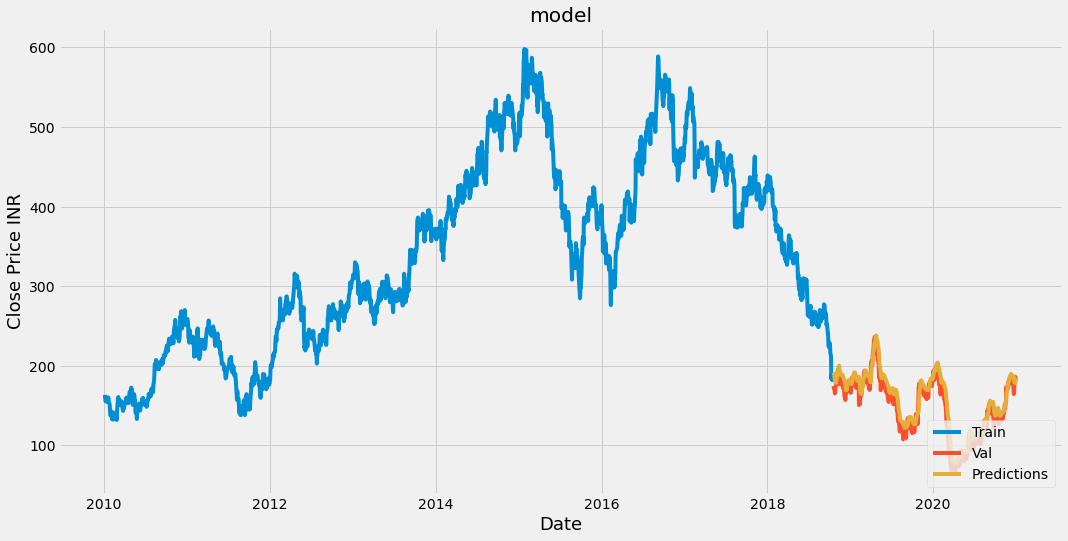

In [21]:
# Plot the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions 

# Visusalize the data
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('Date', fontsize =18)
plt.ylabel('Close Price INR', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']]) 
plt.legend(['Train', 'Val', 'Predictions'], loc= 'lower right')
plt.show()

In [22]:
# Show the valid and Predicted Price 
valid

,Close,Predictions
Date,,
2018-10-19,174.70,191.546936
2018-10-22,170.75,189.216812
2018-10-23,170.65,186.553375
2018-10-24,170.65,184.120941
2018-10-25,165.35,182.178665
...,...,...
2020-12-24,175.95,179.084641
2020-12-28,186.35,178.438309
2020-12-29,183.45,180.365768
